In [185]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [186]:
import warnings
warnings.filterwarnings("ignore")

In [187]:
ft_cell_dens_in_norm = np.load('/home/dascim/repos/histograph/data/input/features/001_cell_densities_outside_norm.npy', allow_pickle=True)

In [188]:
ft_cell_dens_in_norm

,tcell _25,tcell _106,tcell _107,tcell _108,cd68,cd163,cd206,ms4a4a
0,0.257025,0.137250,0.184868,0.114819,0.000000,0.066371,0.291277,0.001030
1,0.135442,0.158814,0.168364,0.117144,0.054299,0.145036,0.118012,0.000814
2,0.111499,0.145635,0.182275,0.126289,0.020531,0.129443,0.243805,0.023673
3,0.144996,0.177253,0.169619,0.131961,0.095129,0.043360,0.270561,0.003495
4,0.107625,0.150062,0.156237,0.124611,0.063134,0.056915,0.279453,0.016051
...,...,...,...,...,...,...,...,...
104,0.273011,0.197233,0.272433,0.218574,0.037162,0.107047,0.044047,0.005152
105,0.319537,0.337932,0.343532,0.314880,0.056707,0.318029,0.066525,0.018618
106,0.218846,0.228941,0.253933,0.227141,0.068042,0.162680,0.125074,0.046812
107,0.241547,0.360451,0.380728,0.369360,0.041345,0.020358,0.029522,0.000000


In [189]:
dist_to_glom = np.load("/home/dascim/repos/histograph/data/input/features/002_dist_to_glom_norm.npy", allow_pickle=True)
dist_to_glom

,mean tcell _25,mean tcell _106,mean tcell _107,mean tcell _108,mean cd68,mean cd163,mean cd206,mean ms4a4a,std tcell _25,std tcell _106,std tcell _107,std tcell _108,std cd68,std cd163,std cd206,std ms4a4a
0,0.360457,0.300601,0.429295,0.780689,0.034892,0.132198,0.197701,0.777723,0.301651,0.618265,0.459499,0.944266,0.728202,0.716434,0.844891,0.963472
1,0.511267,0.398584,0.542908,0.804037,0.631419,0.520124,0.691053,0.842337,0.306595,0.438052,0.199910,0.860190,0.347826,0.101805,0.353226,0.830978
2,1.000000,0.512790,0.823616,0.826785,0.987978,1.000000,1.037261,0.929059,0.505674,0.472603,0.571074,0.840289,0.852996,0.563648,0.650464,0.797419
3,0.530099,0.651073,0.621160,0.917329,0.155383,0.645945,0.576543,0.857609,0.508819,0.513242,0.609995,0.929857,0.605523,0.821723,0.884336,0.911778
4,0.516553,0.122318,0.581260,0.733002,0.518034,0.205868,0.502801,0.806949,0.651387,0.774429,0.932875,1.031834,0.590012,0.319981,0.804683,0.875282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.388119,0.303734,0.562190,0.809885,0.651990,0.591452,0.623594,0.860570,0.601168,0.155860,0.817351,0.885232,0.434078,0.184769,0.417738,0.843756
97,0.641790,0.395579,0.734809,0.804997,0.629816,0.419406,0.680288,0.829011,0.716998,0.533029,0.735785,0.910813,0.602820,0.676694,0.869322,0.934560
98,0.420686,0.589785,0.619999,0.820202,0.047235,0.605300,0.379085,0.830133,0.547467,0.772603,0.647225,0.905100,0.151939,0.335814,0.140858,0.827106
99,0.401190,0.353948,0.527392,0.809555,0.584985,0.370044,0.514588,0.803285,0.754971,0.727549,0.876579,0.922969,0.818214,0.549082,0.719430,0.919167


In [190]:
controids = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/IFTA_EXC_001_25_centroids.npy')
controids

,centroid,label gt
label,,
1,"[94, 1120]",-1
2,"[134, 977]",-1
3,"[288, 1080]",1
4,"[333, 1317]",-1
5,"[379, 1001]",2
...,...,...
166,"[1909, 1397]",179
167,"[1917, 1270]",180
168,"[1931, 493]",185


In [191]:
controids_from_gt = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/IFTA_EXC_001_25_centroids_from_gt.npy')
controids_from_gt

,centroid,label gt
label,,
1,"[288, 1079]",1
2,"[380, 1001]",2
3,"[445, 554]",7
4,"[463, 1006]",4
5,"[465, 602]",8
...,...,...
171,"[1909, 1398]",179
172,"[1918, 1271]",180
173,"[1930, 493]",185


In [192]:
controids_gt = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/IFTA_EXC_001_25_gt_centroids.npy')
controids_gt

,centroid
label,
1,"[288, 1079]"
2,"[380, 1001]"
4,"[463, 1006]"
5,"[486, 1092]"
7,"[445, 554]"
...,...
224,"[1223, 1789]"
225,"[1154, 178]"
600,"[986, 1428]"


<Axes: ylabel='Frequency'>

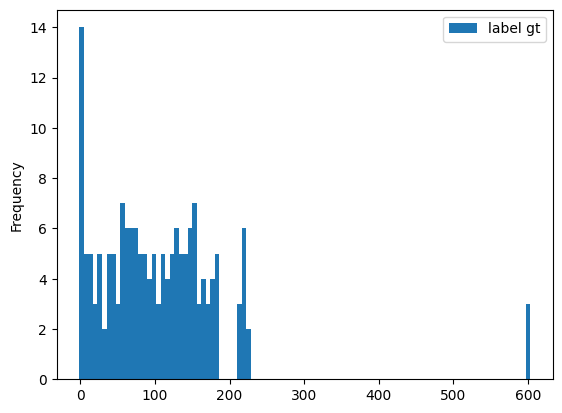

In [193]:
controids.plot.hist(column=['label gt'], bins=100)

In [194]:
matching_centriods = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/matching_across_stainings_001.npy')

In [195]:
matching_centriods

,s1,s2,s3,s4
0,5.0,32.0,29.0,28.0
1,6.0,8.0,5.0,6.0
2,7.0,10.0,6.0,7.0
3,8.0,11.0,7.0,10.0
4,10.0,12.0,8.0,9.0
...,...,...,...,...
123,165.0,179.0,169.0,161.0
124,166.0,177.0,167.0,158.0
125,167.0,176.0,168.0,157.0
126,168.0,165.0,164.0,149.0


In [196]:
matching2 = pd.read_pickle('/home/dascim/repos/histograph/data/input/resultats/matching_across_stainings_001_from_gt.npy')

In [197]:
matching2

,s1,s2,s3,s4
0,3,3,3,3
1,5,5,5,5
2,6,6,6,7
3,7,9,9,9
4,8,7,7,6
...,...,...,...,...
152,170,185,177,176
153,171,183,172,173
154,172,182,173,172
155,173,172,169,161


## EDA annotations (scale of the data)

### EXA

In [198]:
df_exa = pd.read_csv('/home/dascim/repos/histograph/data/input/annotations_exa.csv', delimiter=";")

# edit columns
df_exa.drop(['User', 'Annotation thumb', 'Annotation in Cytomine'], axis=1, inplace=True)
df_exa.rename(columns={"Area (microns²)": "area", "Perimeter (mm)": "perimeter"}, inplace=True)

# get patient and staining
df_exa["patient"] = df_exa['Image filename'].str.split('_').str[2]
df_exa['staining'] = df_exa['Image filename'].str.split('_').str[-1]
df_exa['staining'] = df_exa['staining'].str.split('.').str[0]

In [199]:
df_exa.head()

,ID,area,perimeter,Center X,Center Y,Image ID,Image filename,Term,patient,staining
0,1319092,1.304132e+08,368.622910,38648.24,32332.98,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
1,1319079,2.297246e+05,26.640355,63115.22,35394.79,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
2,1319066,1.030112e+06,71.368555,65964.75,38798.23,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
3,1319053,2.929543e+05,19.991924,60092.71,38967.51,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13
4,1319040,1.319759e+05,5.512392,48806.88,47451.03,92709,IFTA_Nx_0019_13.svs,Tissue,0019,13


In [200]:
by_patient = df_exa.groupby("patient")
by_patient["staining"].unique()

patient
0010            [03, 32, 02, 39, 16]
0011            [32, 39, 16, 02, 03]
0012            [32, 39, 16, 03, 02]
0013            [39, 16, 32, 03, 02]
0014            [39, 16, 32, 02, 03]
0015            [02, 32, 39, 16, 03]
0016    [13, 01, 16, 39, 32, 02, 03]
0017    [13, 01, 03, 02, 39, 32, 16]
0018    [13, 01, 03, 16, 39, 32, 02]
0019    [13, 01, 39, 16, 32, 03, 02]
Name: staining, dtype: object

=> Annotations in stainings 13 and 01 only available for patien 16-19. In stainings 02, 03, 16, 32, 39 available for all patients

In [201]:
by_patient_staining = df_exa.groupby(['patient', 'staining'])
df_heatmap = by_patient_staining["ID"].count()

In [202]:
# Pivot the DataFrame to have 'patient' as rows and 'staining' as columns
heatmap_data = df_heatmap.reset_index().pivot(index='patient', columns='staining', values='ID')
heatmap_data.fillna(0)

staining,01,02,03,13,16,32,39
patient,,,,,,,
0010,0.0,178.0,192.0,0.0,184.0,167.0,199.0
0011,0.0,169.0,139.0,0.0,119.0,1.0,130.0
0012,0.0,76.0,80.0,0.0,61.0,83.0,70.0
0013,0.0,415.0,403.0,0.0,340.0,412.0,401.0
0014,0.0,196.0,183.0,0.0,154.0,189.0,169.0
0015,0.0,227.0,222.0,0.0,196.0,227.0,205.0
0016,400.0,2.0,395.0,396.0,386.0,400.0,373.0
0017,248.0,241.0,241.0,242.0,203.0,227.0,235.0
0018,452.0,353.0,337.0,408.0,340.0,346.0,333.0


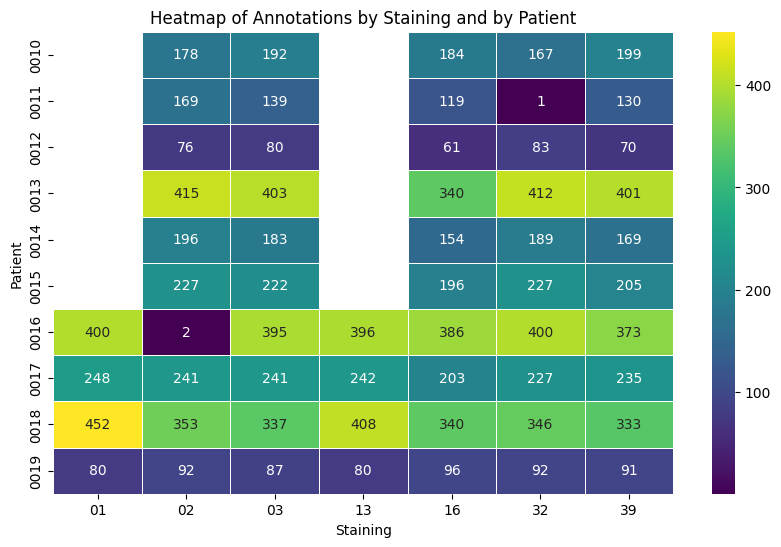

In [205]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Annotations by Staining and by Patient')
plt.xlabel('Staining')
plt.ylabel('Patient')
plt.show()

Text(0.5, 1.0, 'Number of Annotations by patient')

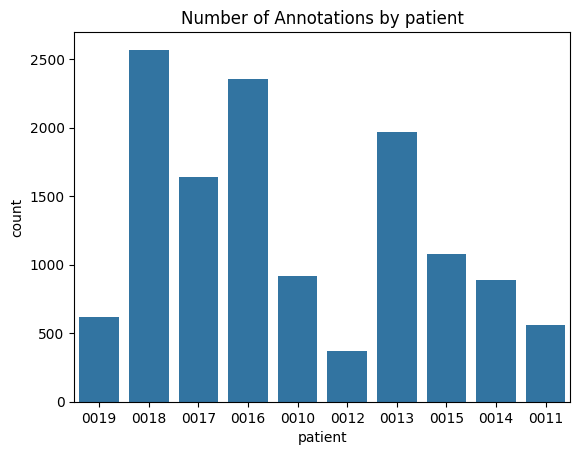

In [206]:
sns.countplot(data=df_exa, x="patient")
plt.title("Number of Annotations by patient")

<Axes: title={'center': 'Number of annotations by patient and category'}, xlabel='patient'>

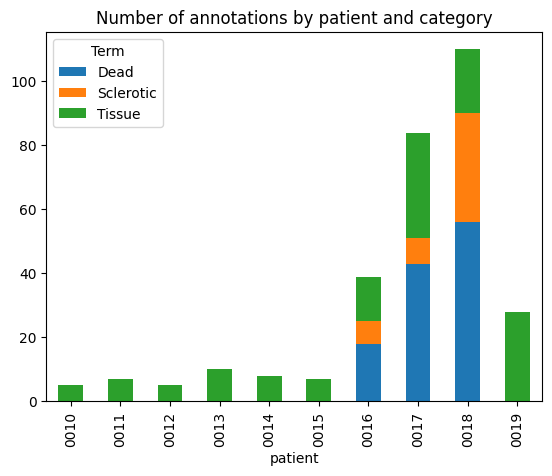

In [208]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by patient and category')

Text(0.5, 1.0, 'Annotations bei staining')

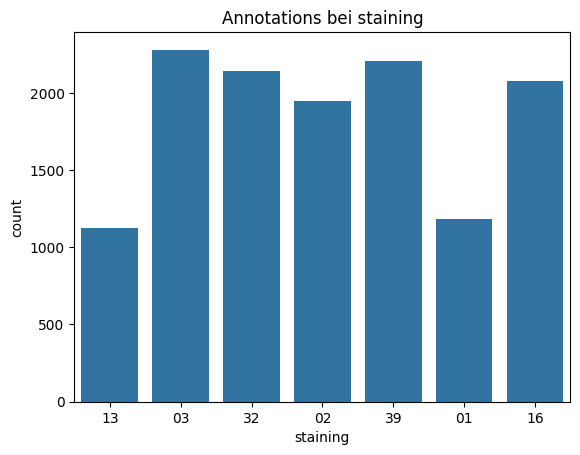

In [209]:
sns.countplot(data=df_exa, x="staining")
plt.title('Annotations bei staining')

<Axes: title={'center': 'Number of annotations by staining and category'}, xlabel='staining'>

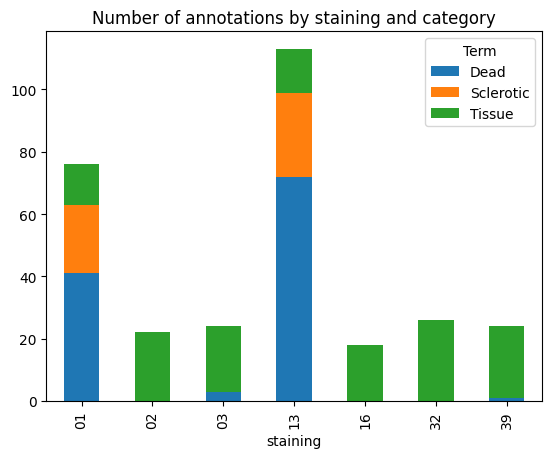

In [210]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['staining', 'Term']).size().reset_index().pivot(columns='Term', index='staining', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by staining and category')

=> Why are the unhealthy glomeruli only in some stainings?
Most are in the stainings where we have no annotations for patients 10-15

Text(0.5, 1.0, 'Total Annotations by category')

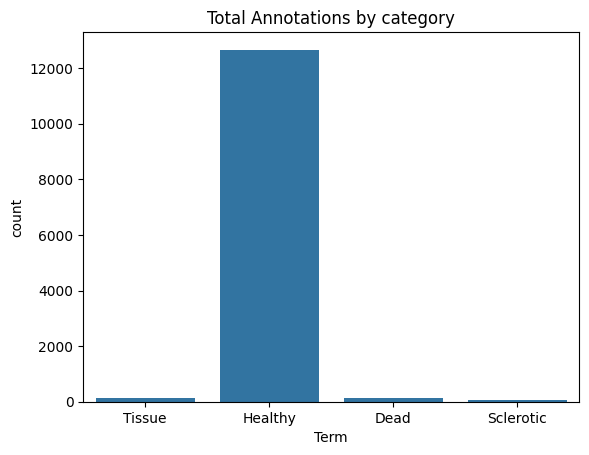

In [211]:
sns.countplot(data=df_exa, x="Term")
plt.title('Total Annotations by category')

/home/dascim/miniconda3/envs/histograph/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


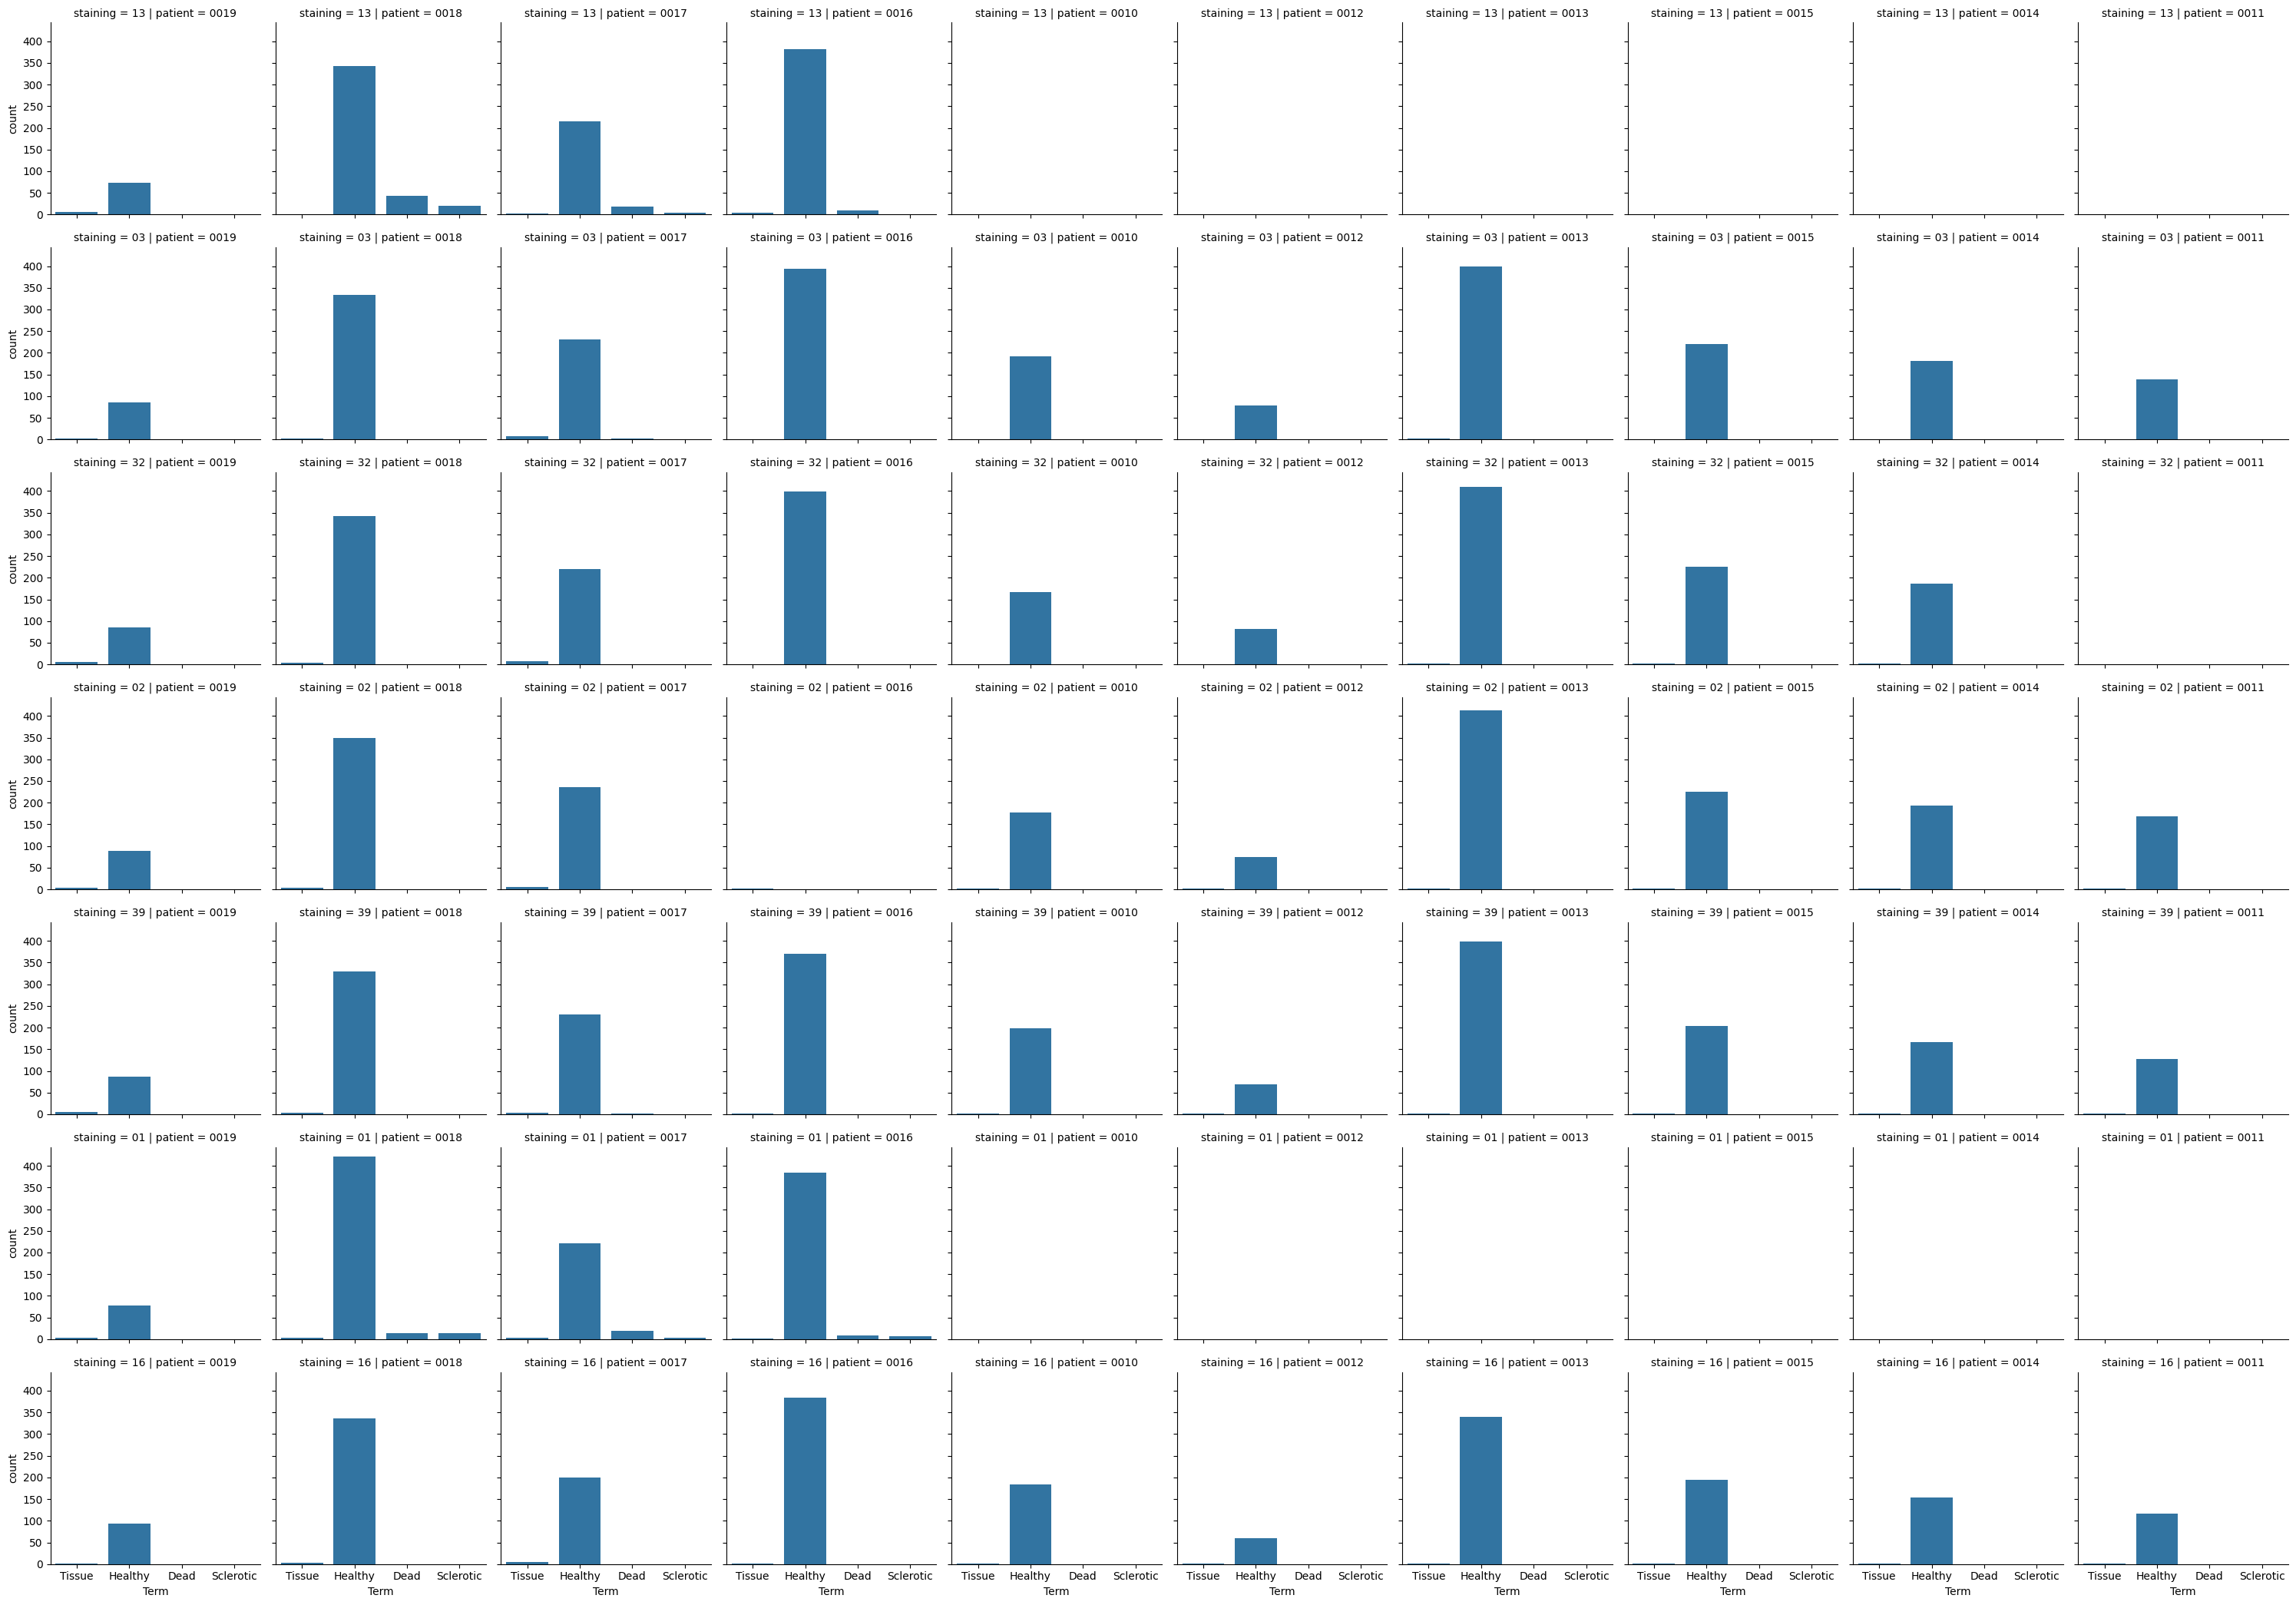

In [24]:
g = sns.FacetGrid(df_exa, col="patient",  row="staining")
g.map(sns.countplot, "Term")

### EXC

In [213]:
df_exa = pd.read_csv('/home/dascim/repos/histograph/data/input/annotations_exc.csv', delimiter=";")

# edit columns
df_exa.drop(['User', 'Annotation thumb', 'Annotation in Cytomine'], axis=1, inplace=True)
df_exa.rename(columns={"Area (microns²)": "area", "Perimeter (mm)": "perimeter"}, inplace=True)

# get patient and staining
df_exa["patient"] = df_exa['Image filename'].str.split('_').str[2]
df_exa['staining'] = df_exa['Image filename'].str.split('_').str[-1]
df_exa['staining'] = df_exa['staining'].str.split('.').str[0]

In [214]:
df_exa.head()

,ID,area,perimeter,Center X,Center Y,Image ID,Image filename,Term,patient,staining
0,1354829,2.422125e+04,0.566451,18364.42,62022.07,13623,IFTA_EXC_001_NX_III_10_106.svs,Healthy,001,106
1,1354812,2.972635e+04,0.629057,17890.31,62467.36,13623,IFTA_EXC_001_NX_III_10_106.svs,Healthy,001,106
2,1354674,1.150714e+08,50.784761,21386.30,41638.80,13623,IFTA_EXC_001_NX_III_10_106.svs,Tissue,001,106
3,1354653,1.546308e+04,0.462972,17944.09,3422.46,13623,IFTA_EXC_001_NX_III_10_106.svs,Dead,001,106
4,1354640,6.194769e+03,0.298435,29819.91,9208.72,13623,IFTA_EXC_001_NX_III_10_106.svs,Dead,001,106


In [215]:
by_patient = df_exa.groupby("patient")
by_patient["staining"].unique()

patient
001    [106, 107, 108, 25, 32]
002        [25, 107, 106, 108]
003        [108, 107, 106, 25]
004        [106, 107, 108, 25]
005        [107, 108, 106, 25]
006        [108, 107, 106, 25]
Name: staining, dtype: object

In [216]:
by_patient_staining = df_exa.groupby(['patient', 'staining'])
df_heatmap = by_patient_staining["ID"].count()

In [217]:
# Pivot the DataFrame to have 'patient' as rows and 'staining' as columns
heatmap_data = df_heatmap.reset_index().pivot(index='patient', columns='staining', values='ID')
heatmap_data.fillna(0)

staining,106,107,108,25,32
patient,,,,,
001,544.0,508.0,507.0,517.0,1.0
002,270.0,280.0,271.0,284.0,0.0
003,141.0,141.0,131.0,107.0,0.0
004,288.0,302.0,273.0,276.0,0.0
005,2.0,2.0,2.0,2.0,0.0
006,5.0,5.0,6.0,6.0,0.0


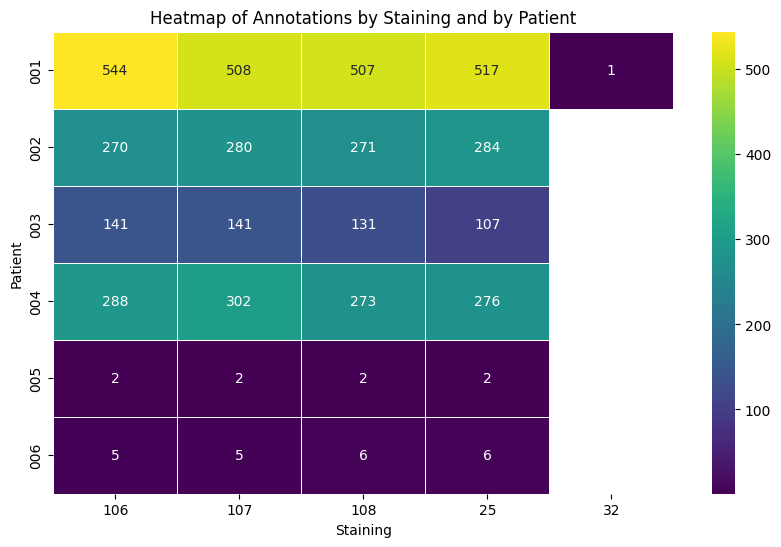

In [218]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Annotations by Staining and by Patient')
plt.xlabel('Staining')
plt.ylabel('Patient')
plt.show()

-> Patients 005 and 006 should be ignored due to lack of annotations

-> That one sample in staining one might be a error

Text(0.5, 1.0, 'Number of Annotations by patient')

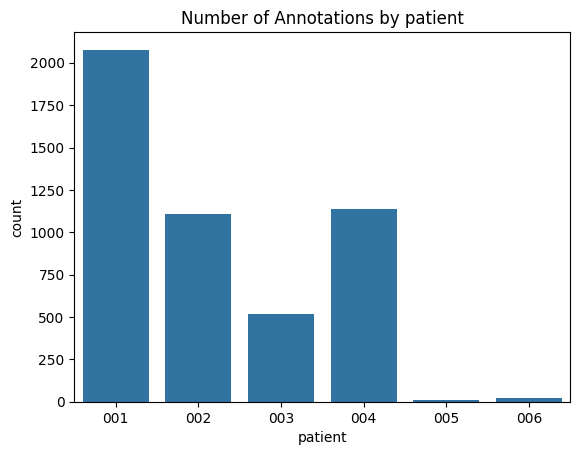

In [219]:
sns.countplot(data=df_exa, x="patient", order=["001", "002", "003","004","005","006"])
plt.title("Number of Annotations by patient")

<Axes: title={'center': 'Number of annotations by patient and category'}, xlabel='patient'>

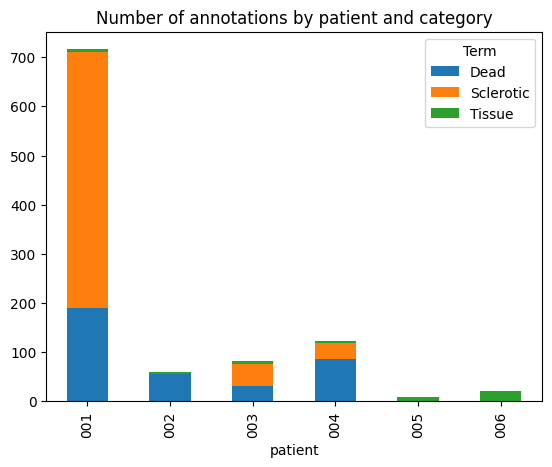

In [220]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['patient', 'Term']).size().reset_index().pivot(columns='Term', index='patient', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by patient and category')

Text(0.5, 1.0, 'Annotations bei staining')

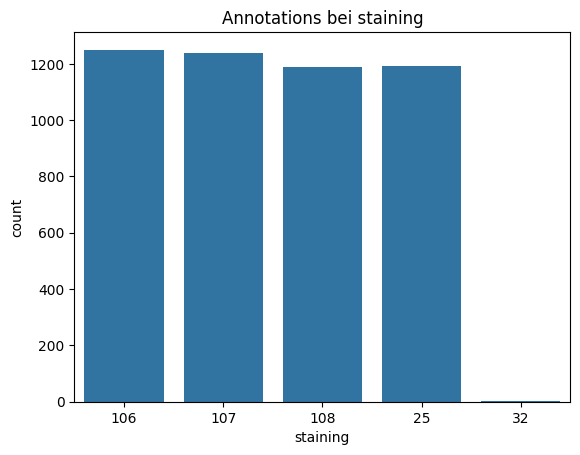

In [221]:
sns.countplot(data=df_exa, x="staining")
plt.title('Annotations bei staining')

<Axes: title={'center': 'Number of annotations by staining and category'}, xlabel='staining'>

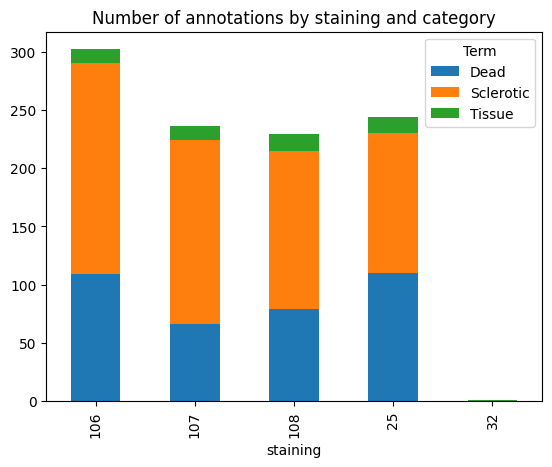

In [222]:
df_plot = df_exa[df_exa["Term"] != "Healthy"].groupby(['staining', 'Term']).size().reset_index().pivot(columns='Term', index='staining', values=0)
df_plot.plot(kind='bar', stacked=True, title='Number of annotations by staining and category')

=> Overall the distribution of dead and sclerotic glomeruli over patients and stainings seems much more smooth in the EXC dataset, why we should focus on this set for initial experiments.

Text(0.5, 1.0, 'Total numbers of annotations')

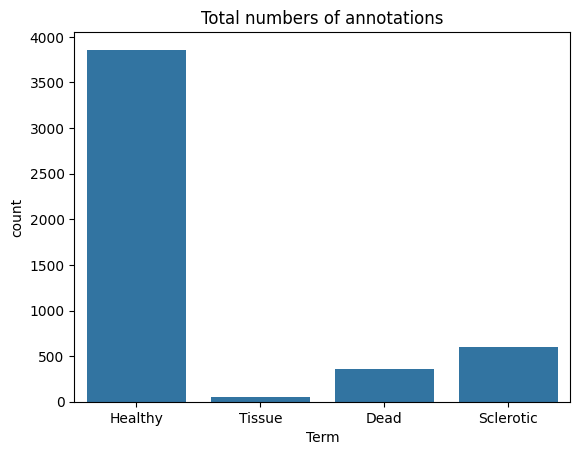

In [223]:
sns.countplot(data=df_exa, x="Term")
plt.title('Total numbers of annotations')

/home/dascim/miniconda3/envs/histograph/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


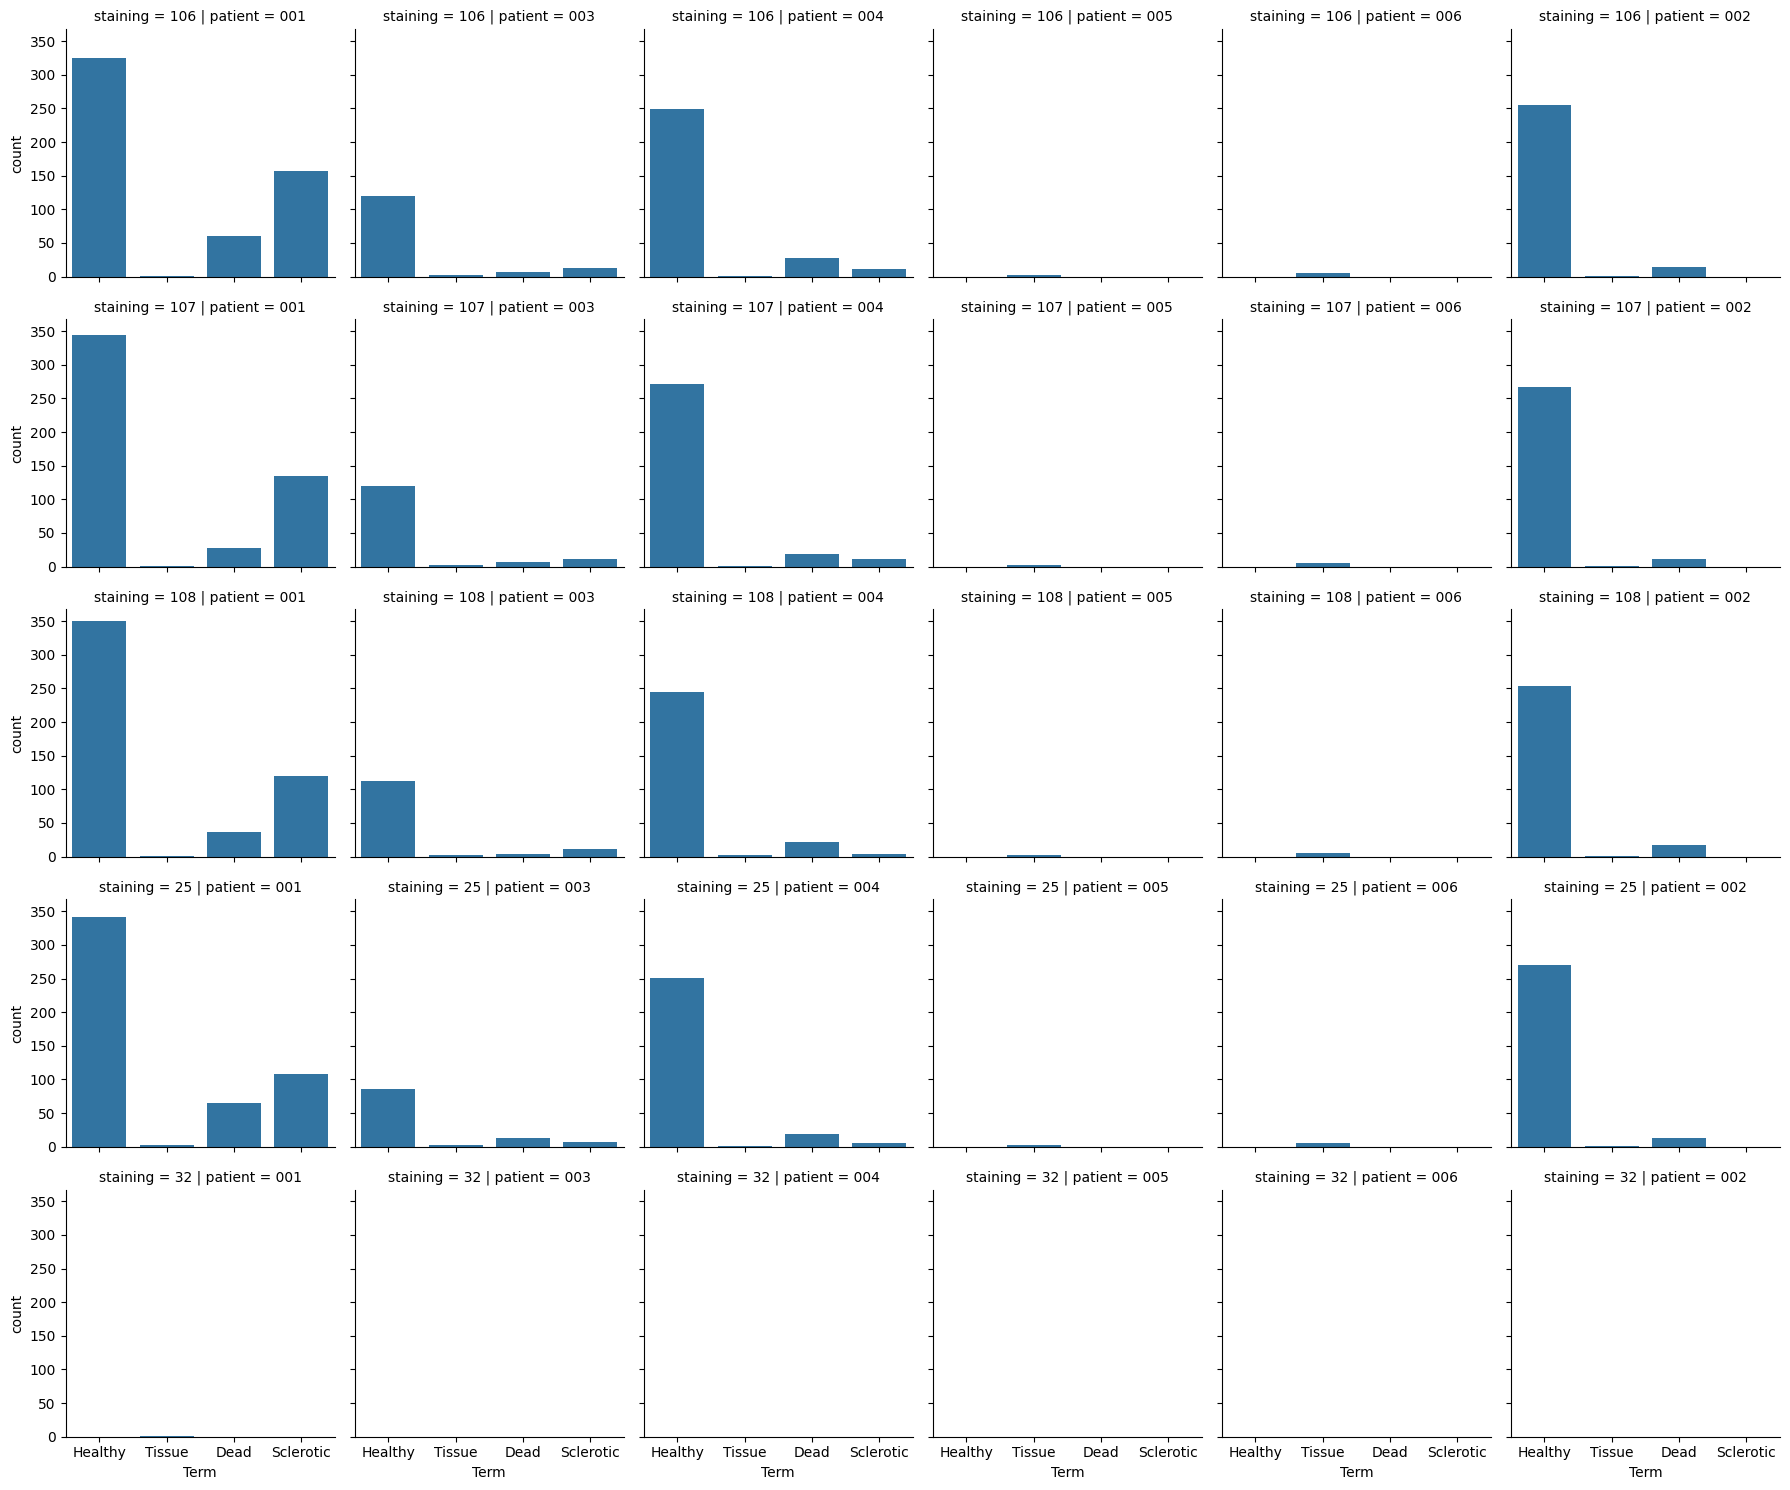

In [36]:
g = sns.FacetGrid(df_exa, col="patient",  row="staining")
g.map(sns.countplot, "Term")

## Neighborhood EDA

In [37]:
df_exc = df_exa.copy()

In [52]:
df_exc = df_exc[(df_exc['patient'] != '005')]
df_exc = df_exc[(df_exc['patient'] != '006')]
df_exc = df_exc[df_exc['staining'] != '32']

In [53]:
df_exc

,ID,area,perimeter,Center X,Center Y,Image ID,Image filename,Term,patient,staining
0,1354829,2.422125e+04,0.566451,18364.42,62022.07,13623,IFTA_EXC_001_NX_III_10_106.svs,Healthy,001,106
1,1354812,2.972635e+04,0.629057,17890.31,62467.36,13623,IFTA_EXC_001_NX_III_10_106.svs,Healthy,001,106
2,1354674,1.150714e+08,50.784761,21386.30,41638.80,13623,IFTA_EXC_001_NX_III_10_106.svs,Tissue,001,106
3,1354653,1.546308e+04,0.462972,17944.09,3422.46,13623,IFTA_EXC_001_NX_III_10_106.svs,Dead,001,106
4,1354640,6.194769e+03,0.298435,29819.91,9208.72,13623,IFTA_EXC_001_NX_III_10_106.svs,Dead,001,106
...,...,...,...,...,...,...,...,...,...,...
4866,981711,2.349416e+04,0.580876,11975.69,63864.11,36886,IFTA_EXC_004_NX_NE3_25.svs,Healthy,004,25
4867,981698,8.780346e+03,0.374080,24743.01,64048.83,36886,IFTA_EXC_004_NX_NE3_25.svs,Healthy,004,25
4868,981685,1.291179e+04,0.467041,16769.94,64134.89,36886,IFTA_EXC_004_NX_NE3_25.svs,Healthy,004,25
4869,981672,1.286474e+04,0.427479,21887.68,64415.87,36886,IFTA_EXC_004_NX_NE3_25.svs,Healthy,004,25


In [54]:
df_exc['Term'].unique()

array(['Healthy', 'Tissue', 'Dead', 'Sclerotic'], dtype=object)

In [91]:
n_neighbors_list = [5, 10, 20]
patients = df_exc['patient'].unique()
stainings = df_exc['staining'].unique()

col_names = ['patient', 'staining', 'Term']
new_col_names = [f'dead n={n}' for n in n_neighbor_list]
new_col_names.extend([f'sclerotic n={n}' for n in n_neighbor_list])
all_col_names = col_names
all_col_names.extend(new_col_names)

results = pd.DataFrame([], columns=new_col_names)

for patient in patients:
    for staining in stainings:
        # Get the samples for the selected patient and staining
        df_subset = df_exc[(df_exc['patient'] == patient) & (df_exc['staining'] == staining)]

        # Get all unhealthy gloms from this patient in this staining
        df_unhealthy = df_subset[(df_subset['Term'] == 'Dead') | (df_subset['Term'] == 'Sclerotic')].reset_index(drop=True)

        for col in new_col_names:
            df_unhealthy[col] = 0 

        for n_neighbors in n_neighbors_list:

            # Fit the NN model to all samples
            neighbors_model = NearestNeighbors(n_neighbors=n_neighbors+1)
            neighbors_model.fit(df_subset[['Center X', 'Center Y']])
            
            # Get all neighbors
            distances, indices = neighbors_model.kneighbors(df_unhealthy[['Center X', 'Center Y']])
            
            # Iterate over all unhealthy samples
            for _ in range(len(df_unhealthy)):
                
                count_dead = sum([1 for idx in indices[_][1:] if df_subset.iloc[idx]['Term'] == 'Dead'])
                count_sclerotic = sum([1 for idx in indices[_][1:] if df_subset.iloc[idx]['Term'] == 'Sclerotic'])
                
                df_unhealthy.at[_, f'dead n={n_neighbors}'] = count_dead
                df_unhealthy.at[_, f'sclerotic n={n_neighbors}'] = count_sclerotic

        results = pd.concat([results, df_unhealthy[all_col_names]])
            

    


[[  3 221 222 223  65  66]
 [  4  81 232  79 226 236]
 [  5 243 246 252 232 258]
 ...
 [218  59 524 217 214 216]
 [219 527  61  58 216 218]
 [220  63  62  61 542 535]]
[[  3 221 222 ...  70  72  67]
 [  4  81 232 ... 239 243 246]
 [  5 243 246 ... 242  92 257]
 ...
 [218  59 524 ...  57 212 516]
 [219 527  61 ... 524 519 214]
 [220  63  62 ... 219 543 530]]
[[  3 221 222 ...  80 230  76]
 [  4  81 232 ...  68  74 257]
 [  5 243 246 ... 256 255  79]
 ...
 [218  59 524 ... 211 206 220]
 [219 527  61 ... 530 535 542]
 [220  63  62 ... 531  59 524]]
[[  1  42  43 169 167 171]
 [  2 231 237  60 238 244]
 [  3 259  81 275 253 251]
 [  4 293   5 284 274  83]
 [  5 293   8   4 306 314]
 [  6   7 311 317 300 319]
 [  7   6 317 311 310 322]
 [  8 306   5 314  10 316]
 [  9 324 318 310  98 317]
 [ 10  12 314   8 306 330]
 [ 11 330 327 325  97  12]
 [ 12 330  97  10  11 316]
 [ 13  98 341 337 102  15]
 [ 14   0  97 349 103 351]
 [ 15 341 102  13 109  98]
 [ 16 382 384 358 383 385]
 [ 17 381 366 11

In [228]:
results.head()

,dead n=5,dead n=10,dead n=20,sclerotic n=5,sclerotic n=10,sclerotic n=20,patient,staining,Term
0,0,0,0,2,7,12,001,106,Dead
1,0,0,1,2,3,5,001,106,Dead
2,0,0,1,0,2,5,001,106,Dead
3,0,0,0,0,4,7,001,106,Dead
4,1,1,1,1,2,3,001,106,Dead


In [229]:
by_p_s_t = results.groupby(["patient", 'staining', 'Term'])

In [230]:
by_p_s_t.mean()

dead n=5 dead n=10 dead n=20 sclerotic n=5  \
patient staining Term                                                    
001     106      Dead       0.852459  1.786885  2.967213      1.508197   
                 Sclerotic  0.579618  1.191083  2.261146      1.878981   
        107      Dead       0.642857  1.285714  2.357143      1.035714   
                 Sclerotic  0.214815  0.525926       1.0      1.911111   
        108      Dead       0.361111  0.805556  1.305556      1.416667   
                 Sclerotic  0.416667  0.941667     1.575          1.65   
        25       Dead       0.830769  1.507692  2.323077      0.892308   
                 Sclerotic  0.638889  1.324074  2.731481          1.75   
002     106      Dead       0.714286  0.857143  1.357143           0.0   
        107      Dead           0.75  0.833333  1.833333           0.0   
        108      Dead       1.235294  1.411765  1.941176           0.0   
        25       Dead       0.923077  1.076923  2.384615           0.0   
003     106      Dead       0.428571  0.571429  1.142857      0.142857   
                 Sclerotic  0.230769  0.538462  1.153846      0.769231   
        107      Dead            0.0  0.714286  0.857143      0.428571   
                 Sclerotic  0.333333      0.75      1.25      0.416667   
        108      Dead            0.5       0.5       0.5           0.0   
                 Sclerotic  0.166667  0.416667       1.0      1.083333   
        25       Dead       1.153846  1.846154  2.769231      0.153846   
                 Sclerotic  0.428571  1.142857  2.571429      0.285714   
004     106      Dead       0.740741  0.925926  2.333333       0.37037   
                 Sclerotic  0.909091  1.545455  3.181818      0.181818   
        107      Dead       0.631579  0.894737       2.0           0.0   
                 Sclerotic       0.0  0.090909  0.636364      0.363636   
        108      Dead       0.636364  0.772727  2.136364      0.045455   
                 Sclerotic      0.25       0.5      1.75           0.5   
        25       Dead       0.526316  0.631579  1.578947      0.105263   
                 Sclerotic       0.2       0.6       1.6           0.4   

                           sclerotic n=10 sclerotic n=20  
patient staining Term                                     
001     106      Dead            2.983607       6.229508  
                 Sclerotic       3.509554       6.732484  
        107      Dead            2.071429       4.178571  
                 Sclerotic       3.844444       7.444444  
        108      Dead            2.888889       5.777778  
                 Sclerotic       3.091667       6.258333  
        25       Dead            2.061538       4.738462  
                 Sclerotic       3.194444       5.935185  
002     106      Dead                 0.0            0.0  
        107      Dead                 0.0            0.0  
        108      Dead                 0.0            0.0  
        25       Dead                 0.0            0.0  
003     106      Dead            0.857143       1.571429  
                 Sclerotic       1.538462       2.384615  
        107      Dead            0.857143       2.571429  
                 Sclerotic       0.583333       1.583333  
        108      Dead                 1.0           1.75  
                 Sclerotic           1.75       3.083333  
        25       Dead            0.384615       0.692308  
                 Sclerotic       0.714286       1.428571  
004     106      Dead             0.62963       1.037037  
                 Sclerotic       0.454545            1.0  
        107      Dead            0.052632       0.526316  
                 Sclerotic       0.545455       0.636364  
        108      Dead            0.045455       0.272727  
                 Sclerotic            0.5            0.5  
        25       Dead            0.105263       0.526316  
                 Sclerotic            0.4            0.4

In [231]:
results.iloc[:, :6].mean()

dead n=5          0.550574
dead n=10         1.046924
dead n=20         1.950991
sclerotic n=5     1.281543
sclerotic n=10    2.475495
sclerotic n=20    4.885297
dtype: object

In [232]:
by_patient.mean().reset_index(drop=True)

,sclerotic n=5,sclerotic n=10,sclerotic n=20
0,1.647887,3.188732,6.291549
1,0.0,0.0,0.0
2,0.48,0.986667,1.893333
3,0.194915,0.305085,0.644068


Text(0.5, 1.0, 'Mean number of dead golmeruli in the neighborhood of other unhealthy glomeruli (dead and sclerotic)')

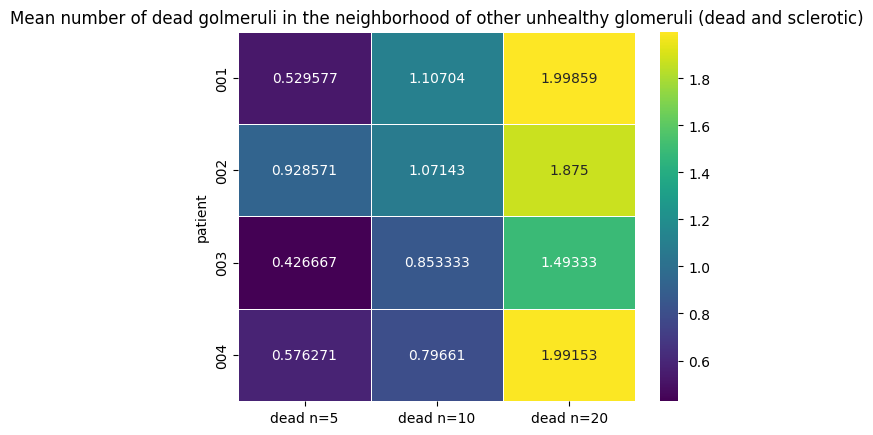

In [233]:
by_patient = results.iloc[:, [0,1,2,6]].groupby("patient")
sns.heatmap(by_patient.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of dead golmeruli in the neighborhood of other unhealthy glomeruli (dead and sclerotic)')

Text(0.5, 1.0, 'Mean number of sclerotic golmeruli in the neighborhood of other unhealthy glomeruli (dead and sclerotic)')

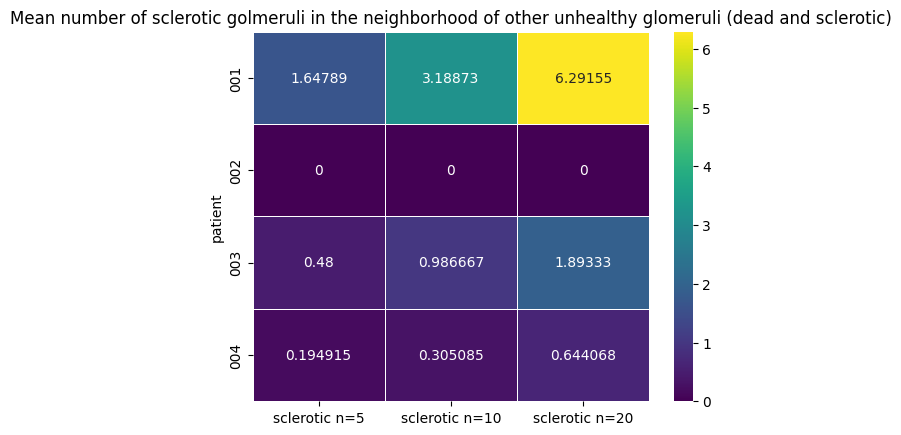

In [234]:
by_patient = results.iloc[:, [3,4,5,6]].groupby("patient")
sns.heatmap(by_patient.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of sclerotic golmeruli in the neighborhood of other unhealthy glomeruli (dead and sclerotic)')

In [235]:
by_patient = results.drop(['staining', 'Term'], axis=1).groupby(['patient'])
plot_data = by_patient.mean() #.pivot(index="Term", columns="patient", values=new_col_names)
plot_data
#.groupby("patient")
#by_patient.mean().plot(kind="bar")

,dead n=5,dead n=10,dead n=20,sclerotic n=5,sclerotic n=10,sclerotic n=20
patient,,,,,,
001,0.529577,1.107042,1.998592,1.647887,3.188732,6.291549
002,0.928571,1.071429,1.875,0.0,0.0,0.0
003,0.426667,0.853333,1.493333,0.48,0.986667,1.893333
004,0.576271,0.79661,1.991525,0.194915,0.305085,0.644068


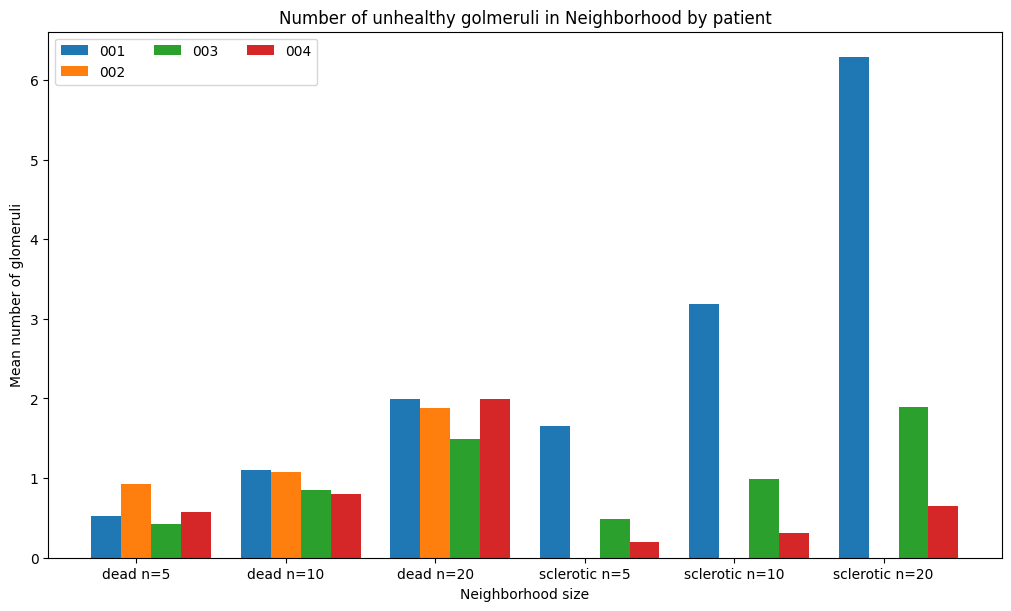

In [236]:
x = np.arange(plot_data.shape[1])  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (10,6))

for _, row in plot_data.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=_)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean number of glomeruli')
ax.set_xlabel('Neighborhood size')
ax.set_title('Number of unhealthy golmeruli in Neighborhood by patient')
ax.set_xticks(x + width, plot_data.columns)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

-> for the Neighborhood of dead glom, there seems to be no big difference

-> Seem is a big difference in the neighborhood of sclerotic glom between patients. There reason for the if the overall variing number of sclerotic glom between patients

Text(0.5, 1.0, 'Mean number of unhealthy golmeruli in the neighborhood of other unhealthy glomeruli by staining')

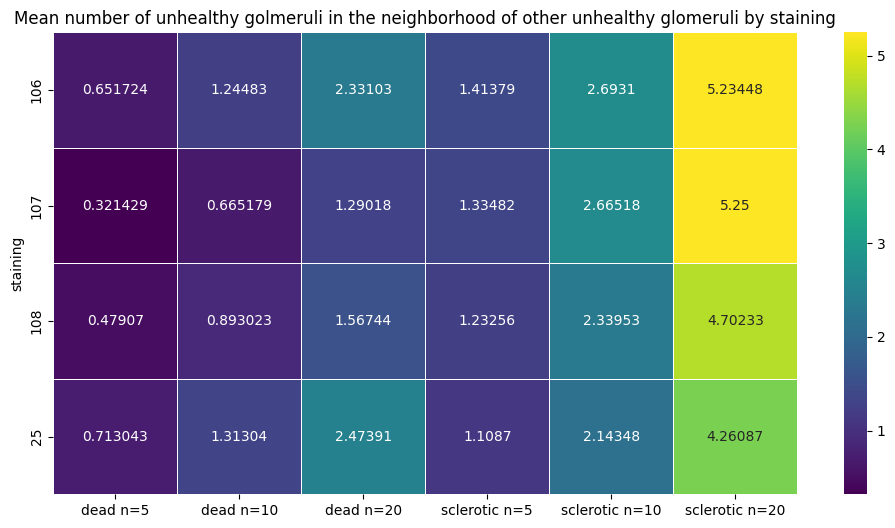

In [237]:
plt.figure(figsize=(12, 6))
by_staining = results.drop(['patient', 'Term'], axis=1).groupby("staining")
sns.heatmap(by_staining.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of unhealthy golmeruli in the neighborhood of other unhealthy glomeruli by staining')

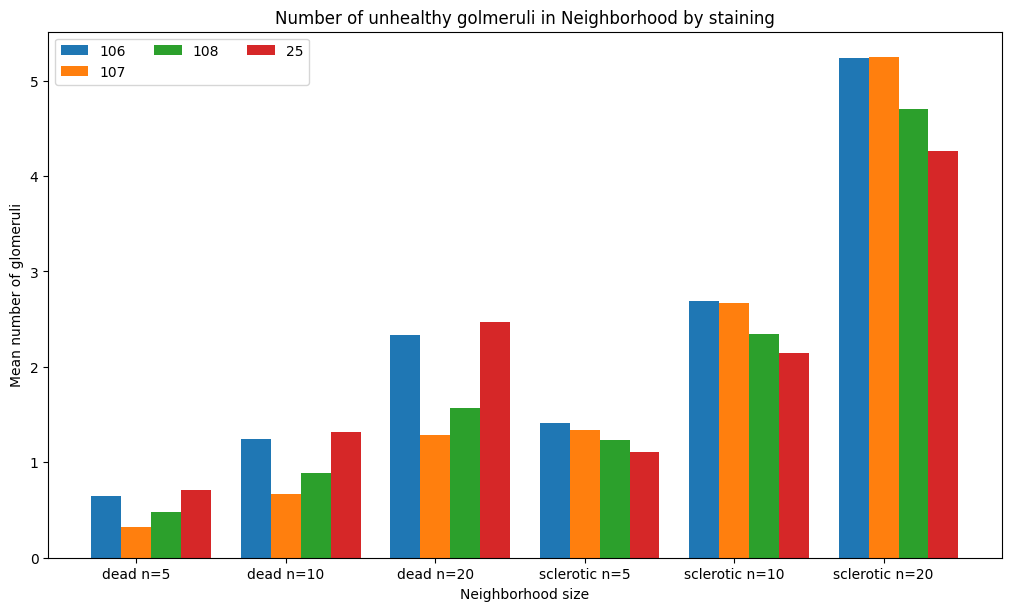

In [238]:
by_staining = results.drop(['Term', 'patient'], axis=1).groupby(['staining'])
plot_data = by_staining.mean() 

x = np.arange(plot_data.shape[1])  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (10,6))

for _, row in plot_data.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=_)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean number of glomeruli')
ax.set_xlabel('Neighborhood size')
ax.set_title('Number of unhealthy golmeruli in Neighborhood by staining')
ax.set_xticks(x + width, plot_data.columns)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

-> Differences can be explained by the differences between the number of dead glom per staining in general

Text(0.5, 1.0, 'Mean number of unhealthy golmeruli in the neighborhood of other unhealthy glomeruli by category')

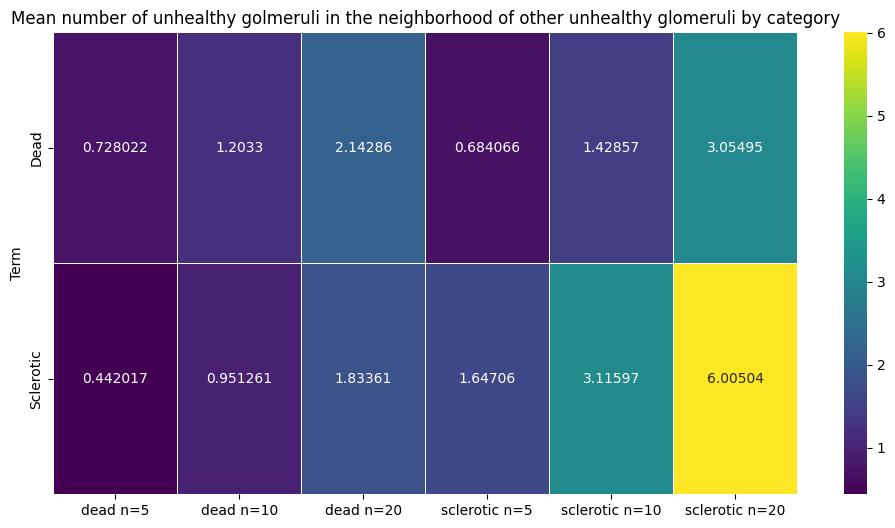

In [242]:
plt.figure(figsize=(12, 6))
by_term = results.drop(['patient', 'staining'], axis=1).groupby("Term")
sns.heatmap(by_term.mean().astype(float), cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Mean number of unhealthy golmeruli in the neighborhood of other unhealthy glomeruli by category')

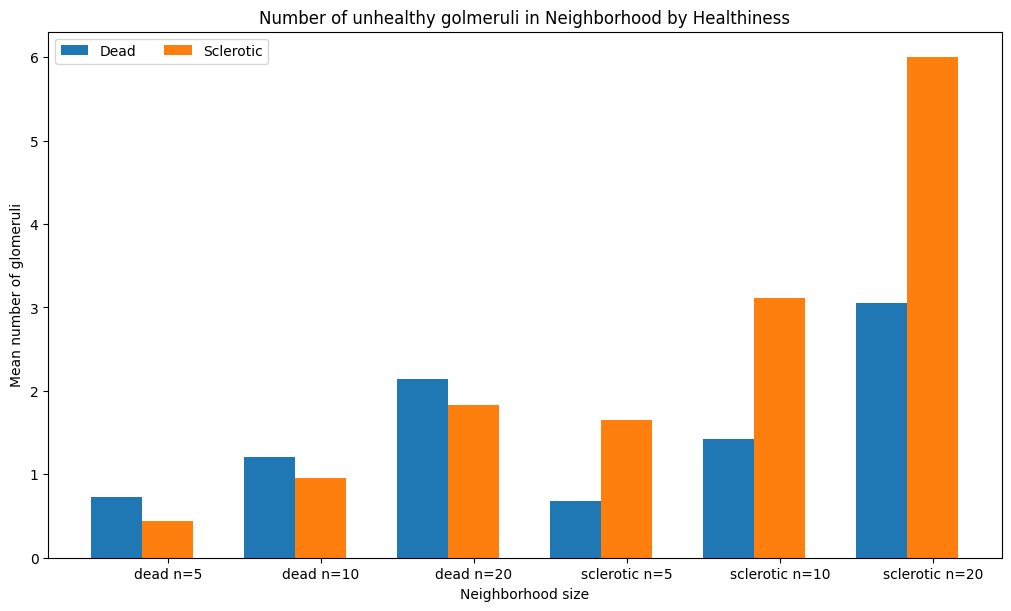

In [240]:
by_term = results.drop(['staining', 'patient'], axis=1).groupby(['Term'])
plot_data = by_term.mean() 

x = np.arange(plot_data.shape[1])  # the label locations
width = 0.3333  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (10,6))

for _, row in plot_data.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=_)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean number of glomeruli')
ax.set_xlabel('Neighborhood size')
ax.set_title('Number of unhealthy golmeruli in Neighborhood by Healthiness')
ax.set_xticks(x + width, plot_data.columns)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250)

plt.show()

-> Dead Glom have more dead glom in Neighborhood and sclerotic more sclerotic

-> Dead Glom seem to be more isolated then sclerotic (?) Or is this an effect from having more sclerotic golmeruli in total?